In [1]:
import platform
import matplotlib as mpl
from matplotlib import font_manager, rc
system = platform.system()
if system == "Windows":
    font_path = "C:/Windows/Fonts/malgun.ttf"
elif system == "Darwin":
    font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"
elif system == "Linux":
    font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
else:
    font_path = None
if font_path:
    font = font_manager.FontProperties(fname=font_path).get_name()
    mpl.rcParams['font.family'] = font
else:
    print("폰트 경로를 확인해주세요.")
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
import pandas as pd

In [20]:
prop_df = pd.read_csv("서울시 부동산 실거래가 정보(2022~2025).csv", encoding='cp949',low_memory=False)
prop_df["단위면적당가격"] = prop_df["물건금액(만원)"] / prop_df["건물면적(㎡)"]
prop_df.head()

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,단위면적당가격
0,2025,11320,도봉구,10600,방학동,1.0,대지,0638,0010,한신빌라(638-10),...,37.66,16.00,4.0,NaN,NaN,1994.0,연립다세대,중개거래,서울 도봉구,392.989910
1,2025,11380,은평구,10800,역촌동,NaN,NaN,NaN,NaN,NaN,...,74.08,182.00,NaN,NaN,NaN,1972.0,단독다가구,직거래,NaN,534.827214
2,2025,11500,강서구,10200,등촌동,1.0,대지,0628,0013,현대프린스텔,...,26.16,35.71,6.0,NaN,NaN,1999.0,오피스텔,중개거래,서울 강서구,393.730887
3,2025,11620,관악구,10200,신림동,1.0,대지,1639,0051,푸리마타운,...,18.70,26.16,8.0,NaN,NaN,2014.0,오피스텔,중개거래,서울 관악구,679.144385
4,2025,11530,구로구,10600,고척동,1.0,대지,0339,0000,고척파크푸르지오,...,59.89,0.00,9.0,NaN,NaN,2009.0,아파트,중개거래,"서울 구로구, 서울 양천구",1402.571381


In [5]:
rate_df = pd.read_csv("interest_rate.csv")
len(rate_df)
rate_df

,date,변경일자,기준금리
0,2025-05-29,20250529,2.50
1,2025-02-25,20250225,2.75
2,2024-11-28,20241128,3.00
3,2024-10-11,20241011,3.25
4,2023-01-13,20230113,3.50
5,2022-11-24,20221124,3.25
6,2022-10-12,20221012,3.00
7,2022-08-25,20220825,2.50
8,2022-07-13,20220713,2.25
9,2022-05-26,20220526,1.75


전체 데이터 개수: 235671
아파트 데이터 개수: 106094


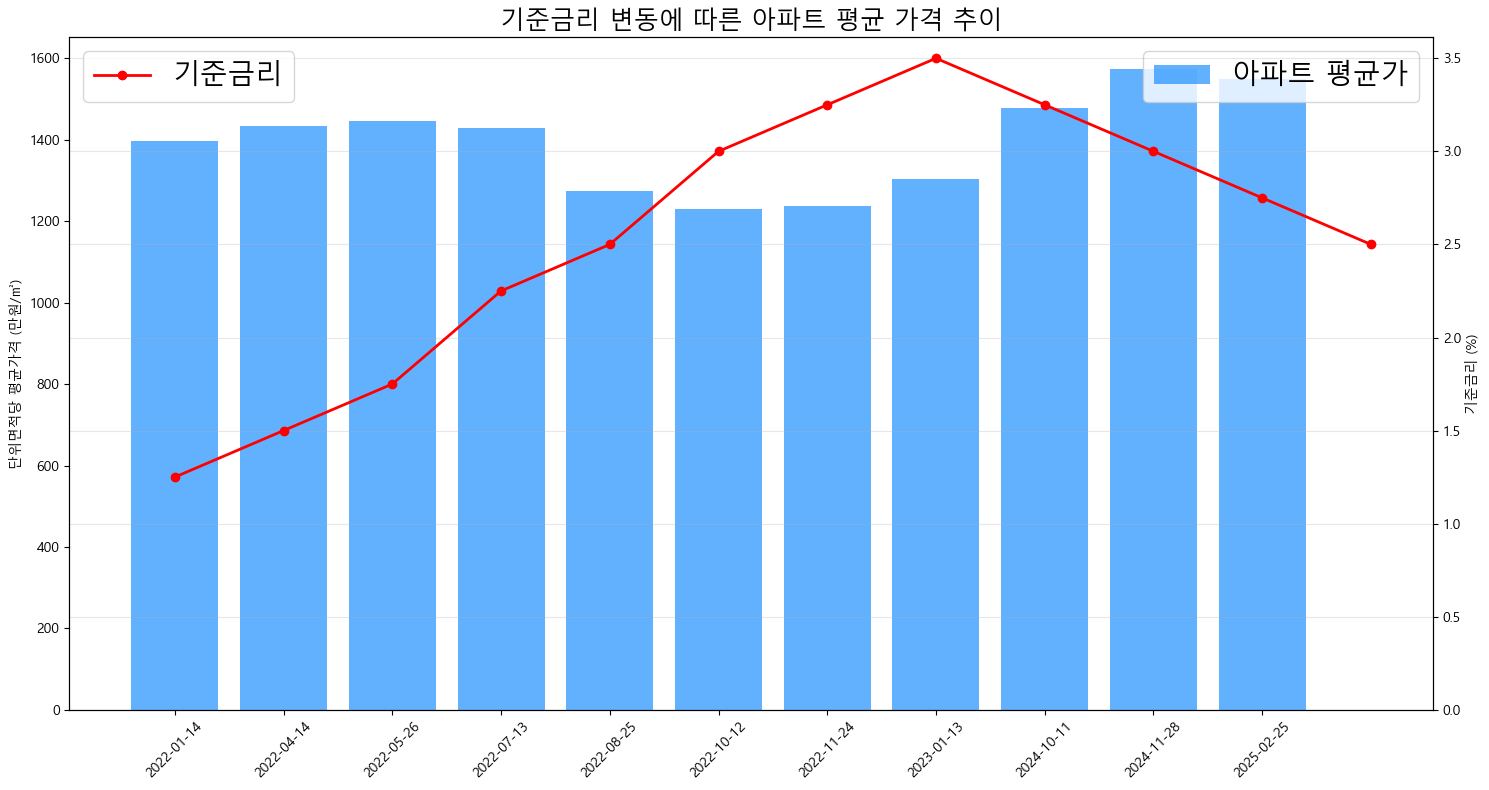

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 필터링 
# '건물용도'가 아파트만 추출 'apt_df' 변수에 저장.
apt_df = prop_df[prop_df["건물용도"] == "아파트"].copy()

# [확인용] 개수 출력.
print(f"전체 데이터 개수: {len(prop_df)}")
print(f"아파트 데이터 개수: {len(apt_df)}")

# 2. 기준금리 변경일자 기준으로 그룹화
x_rate = list(rate_df["변경일자"].values)
bins = rate_df["변경일자"].sort_values().values
labels = [str(i) for i in range(len(rate_df)-1)]

# 금리 데이터 그룹화
cats_rate = pd.cut(x_rate, bins, labels=labels)
rate_df["group"] = cats_rate.codes

# 3. '아파트' 데이터의 계약일 기준으로 그룹화
x_apt = list(apt_df["계약일"].values)
cats_apt = pd.cut(x_apt, bins, labels=labels)
apt_df["group"] = cats_apt.codes

# 4. 시각화 데이터 준비
# group이 -1(범위 밖)인 데이터를 제외.
rdf = rate_df[rate_df["group"] >= 0].sort_values(by="변경일자")
pdf = apt_df[apt_df["group"] >= 0].sort_values(by="group")

# 아파트 데이터(pdf)로만 평균가격 계산.
price_s = pdf.groupby("group")["단위면적당가격"].mean()

# x축 라벨 설정 (날짜 데이터 정리)
xlabels = list(rate_df["date"].sort_values().values)
if len(xlabels) > 2:
    del xlabels[-1]
    del xlabels[0]

# 5. 시각화 실행
fig, ax1 = plt.subplots(figsize=(15, 8))

# 막대 그래프 (아파트 평균 가격)
ax1.bar(price_s.index, price_s.values, color='dodgerblue', alpha=0.7, label='아파트 평균가')
ax1.set_ylabel("단위면적당 평균가격 (만원/㎡)")
ax1.set_xticks(price_s.index)
ax1.set_xticklabels(xlabels, rotation=45)

# 꺾은선 그래프 (기준금리)
ax2 = ax1.twinx()
ax2.plot(rdf["group"].values, rdf["기준금리"].values, color="red", marker='o', linewidth=2, label='기준금리')
ax2.set_ylabel("기준금리 (%)")
ax2.set_ylim(bottom=0)

# 범례 통합 표시
ax1.legend(loc="upper right", fontsize=20)
ax2.legend(loc="upper left", fontsize=20)

plt.title("기준금리 변동에 따른 아파트 평균 가격 추이", fontsize=18)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()